In [174]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

Подключаем необходимые библиотеки.

In [175]:
os.chdir(r'C:\Users\ммм\Desktop\CSC\Анализ данных\Lect_04\задача_1_леденцы')

Задаем рабочую папку.

In [176]:
dataset = pd.read_csv("ledency.dat", sep=";")

Импортируем наши данные.

In [177]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [178]:
print(dataset)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0     4   5   5   5   3   3   3   3   3    3    3
1     5   4   5   5   3   3   3   3   3    3    3
2     5   5   4   5   3   3   3   3   3    3    3
3     5   4   5   5   3   3   3   3   3    3    3
4     4   5   5   5   3   3   3   3   3    3    3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
333   3   3   3   3   3   3   5   5   3    3    3
334   3   3   3   3   3   3   5   5   3    3    3
335   3   3   3   3   3   3   5   5   3    3    3
336   3   3   3   3   3   3   5   5   3    3    3
337   3   3   3   3   3   3   5   5   3    3    3

[338 rows x 11 columns]


Понимаем размерность данных, с которыми мы работаем - 338 человек ответили в опросе по 11 пунктам.

In [179]:
dataset.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Убеждаемся, что с данными все порядке: мы работаем с количественными переменными, каждый из 338 человек ответил на все из 11 вопросов, а также замечаем, что минимум во всех столбцах - 2, а максимум - 5, поэтому опрашиваемые ставили оценки в данном опросе от 2 до 5, следовательно стандартизация не нужна.

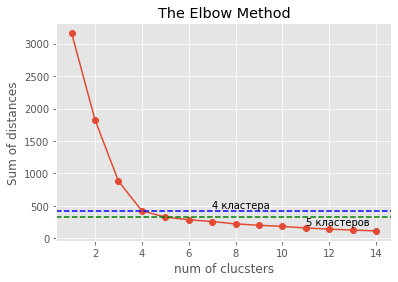

In [180]:
K = range(1, 15)
models = [KMeans(n_clusters=k, random_state=54).fit(dataset) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('num of clucsters')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method')
plt.axhline(423, c='b', linestyle='dashed')
plt.axhline(326, c='g', linestyle='dashed')
plt.text(7, 470, '4 кластера')
plt.text(11, 200, '5 кластеров')
plt.show()

Определим число кластеров при помощи графика каменистой осыпи: исходя из такого графика каменистой осыпи, условно разумным будет работать либо с 4 кластерами, либо с 5 кластерами - потому что меньше, чем 4 кластера брать глупо, а больше чем 5 кластеров будет, скорее всего избыточно (так как сумма расстояний от каждой точки до центра ближайшего к ней кластера в случае пяти кластеров не сильно больше случая с шестью кластерами).

In [181]:
dist[:7]

[3160.03550295858,
 1823.3037037037038,
 879.7165824915826,
 423.14405076980796,
 326.24554187129905,
 286.5851883359455,
 258.4267781471005]

Поэтому, построим две модели - для пяти кластеров и для четырех кластеров, и сравним полученные по ним результаты, после чего сделаем вывод о количестве кластеров по качеству интерпретации результатов модели.

In [182]:
model4clusters = KMeans(n_clusters=4, random_state=54)
medel5clusters = KMeans(n_clusters=5, random_state=54)

In [183]:
model4clusters.fit(dataset)
dataset['clusterkmeans'] = model4clusters.labels_
dataset.groupby('clusterkmeans').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
clusterkmeans,,,,,,,,,,,
0,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
2,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000


В случае выбора четырех кластеров имеем, соответственно 4 группы, которые можно проинтерпретировать следующим образом:

0 группа - те кто поставили максимальные оценки по 9, 10 и 11 пунктам - это те, кто потребляет леденцы для лечения, для улучшения состояния горла, носа и т.д.

1 группа - те, кто поставили максимальные оценки по 1, 2, 3 и 4 пунктам - это те, кто потребляет леденцы для того, чтобы освежить полость рта, избавиться от неприятного запаха, привкуса во рту и т.д.

2 группа - те, кто поставили максимальные оценки по 5 и 6 пунктам - это такие "сладкоежки", которые потребляют леденцы как источник/замена чего-то сладкого

3 группа - те, кто поставили максимальные оценки по 7 и 8 пунктам - это те, кто потребляет леденцы для концентрации внимания, отвлечения и т.д.

Какие различия будут в случае выбора пяти кластеров?

In [184]:
medel5clusters.fit(dataset)
dataset['clusterkmeans'] = medel5clusters.labels_
dataset.groupby('clusterkmeans').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
clusterkmeans,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.642857,2.547619,2.380952,2.000000,2.095238,2.023810,2.380952,2.714286,4.976190,4.785714,4.809524
2,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098
4,2.939394,3.015152,3.015152,3.015152,2.939394,2.939394,2.984848,3.045455,4.939394,4.833333,4.893939


В случае выбора пяти кластеров имеем, соответственно 5 групп, которые можно проинтерпретировать следующим образом:

1 и 4 группы - это те кто поставили максимальные оценки по 9, 10 и 11 пунктам, то есть это те, кто потребляет леденцы для лечения, для улучшения состояния горла, носа. Такое разделение избыточно, потому что 1 и 4 группы - потребители леденцов с общей потребностью в леденцах как средстве лечения и улучшения самочувствия.

В оставшихся группах все как прежде:

0 группа - те, кто поставили максимальные оценки по 1, 2, 3 и 4 пунктам - это те, кто потребляет леденцы для того, чтобы освежить полость рта, избавиться от неприятного запаха, привкуса во рту и т.д.

2 группа - те, кто поставили максимальные оценки по 7 и 8 пунктам - это те, кто потребляет леденцы для концентрации внимания, отвлечения и т.д.

3 группа - те, кто поставили максимальные оценки по 5 и 6 пунктам - это такие "сладкоежки", которые потребляют леденцы как источник/замена чего-то сладкого

Сравнивая результаты кластеризации при 4-х группах и 5-ти группах можно сделать вывод о том, что разумным будет выбрать кластеризацию на 4 группы, так как в случае кластеризации на 5 групп наблюдается избыточное разделение людей, потреюляющих леденцы как средство лечения.

Таким образом, избегая избыточного деления группы потребителей леденцов как средедства лечения на подгруппы, принимаем решение о том, что количество кластеров будет равно четырем, имеем четыре группы потребителей леденцов.

In [185]:
finalmodel = KMeans(n_clusters=4, random_state=54)
finalmodel.fit(dataset)
dataset['clusterkmeans'] = finalmodel.labels_

Имеем 4 кластера со следующими размерами:

In [186]:
dataset.groupby('clusterkmeans').size()

clusterkmeans
0    108
1    110
2     61
3     59
dtype: int64

In [187]:
dataset.groupby('clusterkmeans').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
clusterkmeans,,,,,,,,,,,
0,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
2,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000


Номера респондентов, принадлежащих первому (нулевой группе) кластеру.

In [188]:
dataset[dataset['clusterkmeans']==0].index.values

array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217], dtype=int64)

Номера респондентов, принадлежащих второму (первой группе) кластеру.

In [189]:
dataset[dataset['clusterkmeans']==1].index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109], dtype=int64)

Номера респондентов, принадлежащих третьему (второй группе) кластеру.

In [190]:
dataset[dataset['clusterkmeans']==2].index.values

array([218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278], dtype=int64)

Номера респондентов, принадлежащих четвертому (третьей группе) кластеру.

In [191]:
dataset[dataset['clusterkmeans']==3].index.values

array([279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
       318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
       331, 332, 333, 334, 335, 336, 337], dtype=int64)

Сравним результаты иерархического кластерного анализа и кластерного анализа методом k-средних.
Так как размерности кластеров в иерархическом кластерном анализе и анализе методом k-средних следующие:

In [192]:
link = linkage(dataset, 'ward', 'euclidean')
dataset['clusterhierarcical'] = fcluster(link, 21.65, criterion='distance')
dataset.groupby('clusterhierarcical').size()

clusterhierarcical
1    108
2    110
3     59
4     61
dtype: int64

In [193]:
dataset.groupby('clusterkmeans').size()

clusterkmeans
0    108
1    110
2     61
3     59
dtype: int64

И попарные пересечения (в терминах общих наблюдений) различных номеров групп потребителей (при иерархическом кластерном анализе и кластерном анализе методом k-средних) следующие:

In [194]:
tab = pd.crosstab(dataset['clusterhierarcical'], dataset['clusterkmeans'])
print(tab)

clusterkmeans         0    1   2   3
clusterhierarcical                  
1                   108    0   0   0
2                     0  110   0   0
3                     0    0   0  59
4                     0    0  61   0


То, значит, кластеризации методом k-средних и методом иерархического кластерного анализа в точности совпали - различия только в различной нумерации групп потребителей.

Вывод. Таким образом, в ходе выполнения лабораторной работы было определено, что число кластеров, то есть число сегментов различных потребителей леденцов равно четырем. В результате кластеризации методом k-средних были выделены четыре следующих группы потребителей леденцов:

1) Первая группа потребителей - те, кто потребляет леденцы для того, чтобы избавиться от заложенности в носу/горле.

2) Вторая группа потребителей - те, кто потребляет леденцы для того, чтобы получить "второе дыхаение", чувствовать себя бодрее.

3) Третья группа потребителей - "сладкоежки", которые потребляют леденцы как что-то сладкое/заменитель чего-то сладкого.

4) Четвертая группа потребителей - те, кто потребляет леденцы для увеличения концентрации и для того, чтобы сосредоточиться.

Также было выяснено, что результаты кластеризации исходных данных методом k-средних и методом иерархического кластерного анализа в точности совпадают - различия могут быть только в различной нумерации групп потребителей.